In [2]:
#All paths
main_path="D:/Visual/Project/Image_Classification/Hand"
data_path="D:/Visual/Project/Image_Classification/Data/Hand_1"
function_path="D:/Visual/Project/Image_Classification/Functions"
model_path="/Models/Model_augm_1.h5"

In [1]:
# import splitfolders
# splitfolders.ratio("D:\Visual\Project\Image_Classification\Data\Hand", output="D:\Visual\Project\Image_Classification\Data\Hand_1",seed=42, ratio=(0.7, 0.15, 0.15)) # default values

In [3]:
import os
import sys
import json

sys.path.insert(0,function_path)

# importing module1 from another folder
from Json import *

# d=Call_Dictionary(path)
# Create_Json(name,path,d)

d=Access_Json(data_path+"/Hand.json")

In [4]:
class_name=list(d['Test'])[:-1]
print(class_name)

['paper', 'rock', 'scissors']


Image shape: (200, 300, 3)


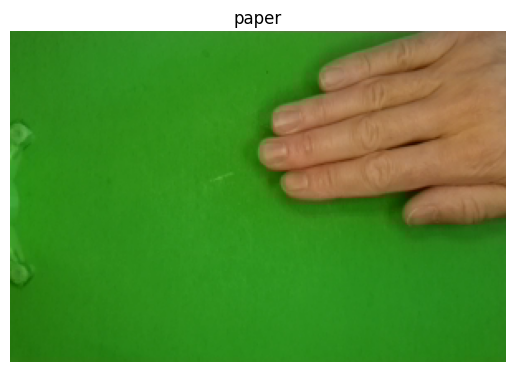

In [5]:
from Image import *
img = view_random_image(target_dir=data_path+"/train/",target_class="paper")

In [5]:
#Path
train_path=data_path+"/train"
test_path=data_path+"/test"
val_path=data_path+"/val"

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis


# Load data in from directories and turn it into batches
# train_data = train_datagen.flow_from_directory(train_path,
#                                                target_size=(224, 224),
#                                                batch_size=32,
#                                                class_mode='categorical') 

train_datagen_augmented= train_datagen_augmented.flow_from_directory(train_path,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') 

val_data = train_datagen.flow_from_directory(val_path,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')


test_data = train_datagen.flow_from_directory(test_path,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 1531 images belonging to 3 classes.
Found 326 images belonging to 3 classes.
Found 331 images belonging to 3 classes.


In [8]:
images, labels = train_datagen_augmented.next() # get the 'next' batch of images/labels
print(labels)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [8]:
len(train_datagen_augmented),len(val_data),len(test_data)

(48, 11, 11)

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

tf.random.set_seed(42)
# Create our model (a clone of model_8, except to be multi-class)
model_baseline= Sequential([
  Conv2D(16, 3, activation='relu', input_shape=(224, 224, 3)),
  
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
            padding="valid"), # padding can also be 'same'
  
  Conv2D(16, 3, activation='relu'),
  
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
            padding="valid"), # padding can also be 'same'

  Conv2D(16, 3, activation='relu'),
  
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
            padding="valid"), # padding can also be 'same'
  
  Flatten(),
  Dense(3, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_baseline.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_baseline = model_baseline.fit(train_datagen_augmented, # now 10 different classes 
                            epochs=5,
                            steps_per_epoch=len(train_datagen_augmented),
                            validation_data=val_data,
                            validation_steps=len(val_data))

Epoch 1/5
48/48 [==============================] - 116s 2s/step - loss: 1.0894 - accuracy: 0.3645 - val_loss: 0.9747 - val_accuracy: 0.5828
Epoch 2/5
48/48 [==============================] - 132s 3s/step - loss: 1.0074 - accuracy: 0.5069 - val_loss: 0.7835 - val_accuracy: 0.6380
Epoch 3/5
48/48 [==============================] - 122s 3s/step - loss: 0.7469 - accuracy: 0.6773 - val_loss: 0.3199 - val_accuracy: 0.8988
Epoch 4/5
48/48 [==============================] - 121s 3s/step - loss: 0.5348 - accuracy: 0.7851 - val_loss: 0.1813 - val_accuracy: 0.9509
Epoch 5/5
48/48 [==============================] - 116s 2s/step - loss: 0.2854 - accuracy: 0.9151 - val_loss: 0.0666 - val_accuracy: 0.9816


In [10]:
model_baseline.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 16)      4624      
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 32)       0         
 2D)                                                    

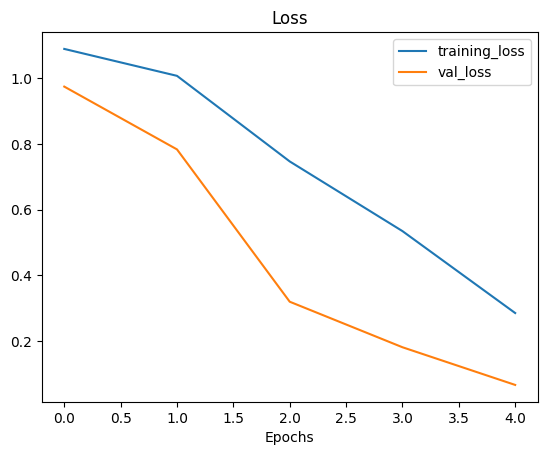

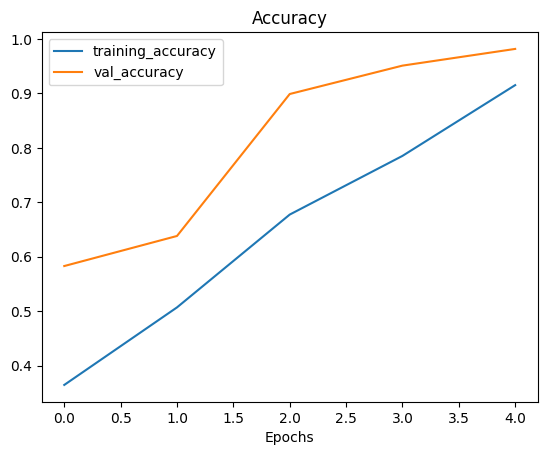

In [11]:
from Plot import plot_loss_curves
plot_loss_curves(history_baseline)

In [12]:
model_baseline.save(main_path+model_path)

In [13]:
#Evaluation the model
loss,acc=model_baseline.evaluate(test_data)
acc=acc*100
print(loss," ",acc,"%")

11/11 [==============================] - 6s 565ms/step - loss: 0.0748 - accuracy: 0.9758
0.07478637993335724   97.58307933807373 %


In [14]:
loaded_saved_model = tf.keras.models.load_model("D:/Visual/Project/Image_Classification/Hand/Models/Model_2.h5")
loaded_saved_model.evaluate(test_data)

11/11 [==============================] - 5s 380ms/step - loss: 0.2003 - accuracy: 0.9456


[0.20028522610664368, 0.9456193447113037]

In [21]:
import random
import matplotlib.image as mpimg 

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  # plt.imshow(img)
  # plt.title(target_class)
  # plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

In [24]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [26]:
import matplotlib.pyplot as plt

def pred_and_plot(model,img, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  
  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img*225)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

Image shape: (200, 300, 3)
1/1 [==============================] - 0s 194ms/step


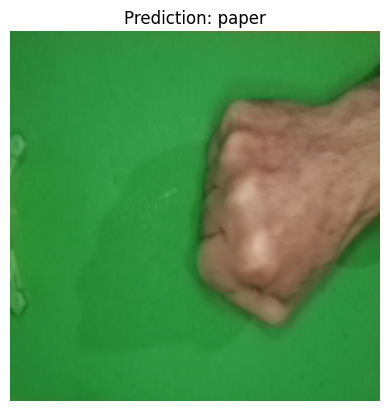

In [52]:
import tensorflow as tf
# Test our model on a custom image
target_class="rock"
p="D:/Visual/Project/Image_Classification/Data/Hand_1/test/"
img=view_random_image(p, target_class)
img=load_and_prep_image(img,224)

model=tf.keras.models.load_model(main_path+model_path)
pred_and_plot(model,img, class_name)


In [54]:
print(class_name)
model.summary()

['paper', 'rock', 'scissors']
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 16)      4624      
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 32)       0         
 2D)                      